In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [132]:
data = pd.read_csv('cars-dataset.csv')
data.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [133]:
data.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [134]:
data.shape

(398, 8)

# So there it is..lots of numbers. We can see that the dataset has the following columns (with their type):

mpg: continuous

cylinders: multi-valued discrete

displacement: continuous

horsepower: continuous

weight: continuous

acceleration: continuous

model year: multi-valued discrete

car name: string (unique for each instance)

In [135]:
data.isnull().any() #nothing seems to be missing

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [136]:
data.dtypes     #But then, why is horsepower an object and not a float, the values we saw above were clearly numbers 

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [137]:
#Let's look at the unique elements of horsepower to look for discrepancies 
data.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [138]:
#When we print out all the unique values in horsepower, we find that there is '?' which was used as a placeholder for missing values. Lest remove these entries.

In [139]:
temp = pd.DataFrame(data.hp.str.isdigit())

temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [140]:
data['hp']=data['hp'].replace('?', np.nan)

In [141]:
#Let us see if we can get those records with nan

data[data.isnull().any(axis=1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


In [142]:
data.median()

cyl        4.0
disp     148.5
wt      2803.5
acc       15.5
yr        76.0
mpg       23.0
dtype: float64

In [143]:
data['hp'] = data['hp'].fillna(data['hp'].median()) #to replace the nan values of hp from it's median value i.e 93.5

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [145]:
data.hp = data.hp.astype('float') #to convert hp into float from object data type
data.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [147]:
#Now everything looks in order so lets continue, let's describe the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [148]:
numeric_cols = data.drop(columns=['car name'], axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(data[['car name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
data = numeric_cols.join(car_names)   # Recreating data by combining numerical columns with car names

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


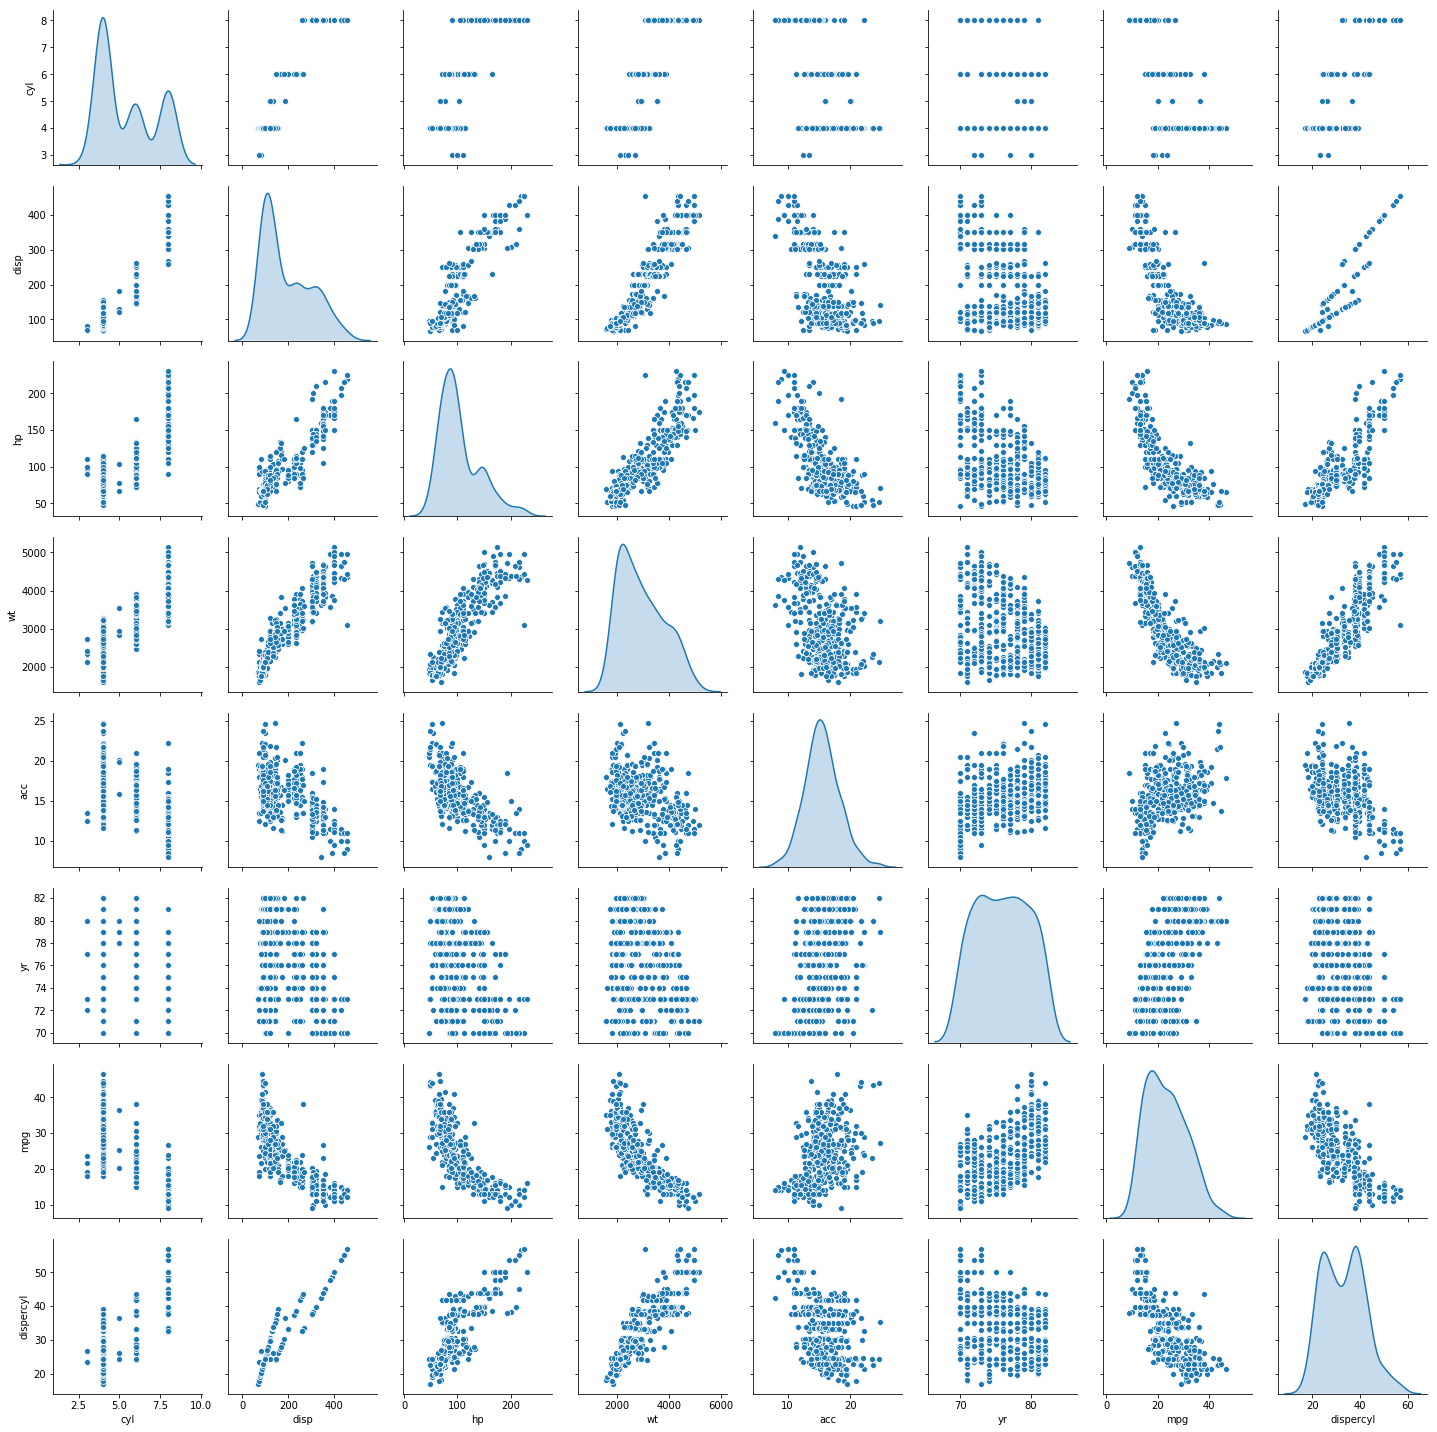

In [149]:
data_df = data.iloc[:, 0:7]
data_df['dispercyl'] = data_df['disp'] / data_df['cyl']
sns.pairplot(data_df, diag_kind='kde')

In [14]:
#The data distribution across various dimensions except 'Acc' do not look normal.
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear.
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy.
#How about 'mpg' vs 'yr' surprising to see a positive relation.
#There are around 3 or 2 visual identification of different clusters existing in the dataset.

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [176]:
from scipy.stats import zscore

data_df = data.loc[:, 'cyl':'mpg']
data_z = data_df.apply(zscore)


    # Remove  "yr" column
data_z.pop('yr')

array = data_z.values

In [177]:
from sklearn.cluster import KMeans

In [178]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428941e+07
1,3,3.420799e+07
2,4,1.905160e+07
3,5,1.376895e+07


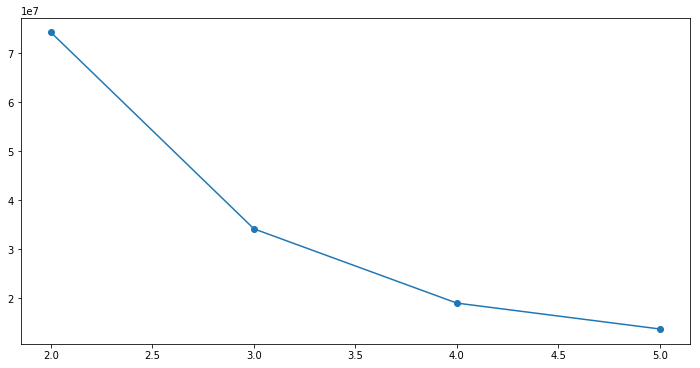

In [179]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [180]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [181]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(data_z)
data_z_copy = data_z.copy(deep = True) 

# Every cluster gets associated with a lable, centroid and intertia....

In [182]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [183]:
centroid_df = pd.DataFrame(centroids, columns = list(data_z) )
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,1.486055,1.484507,1.506241,1.387534,-1.062679,-1.151105
1,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.753947
2,0.345983,0.236894,-0.067740,0.297952,0.300890,-0.472445


In [184]:
prediction=cluster.predict(data_z)
data_z["GROUP"] = prediction  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261BF89C8D0>,
      dtype=object)

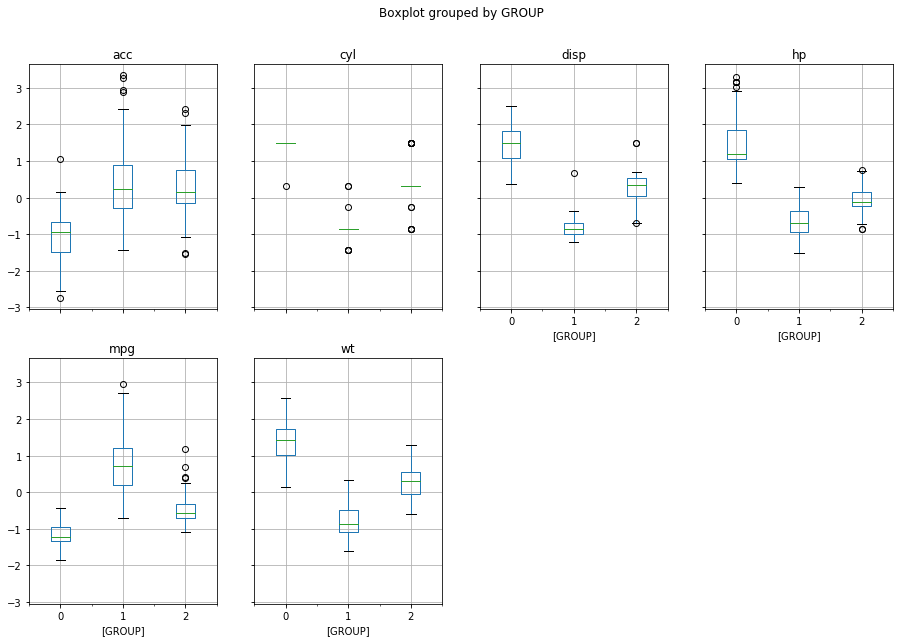

In [185]:
import matplotlib.pylab as plt
data_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))


In [186]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now

In [187]:
# Addressing outliers at group level

data_o = data_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median() # replacing group outliers with group median      
    return group

data_corrected = (data_o.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(data_z['GROUP']))

C:\Users\manuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261C01C6828>,
      dtype=object)

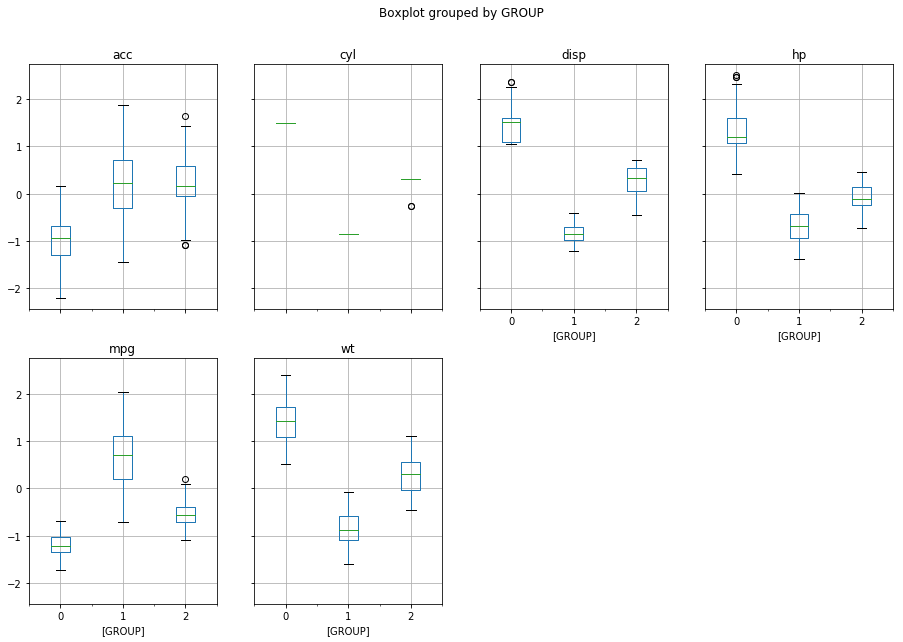

In [188]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

# Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

In [189]:
from scipy.stats import zscore

data_df = data.loc[:, 'cyl':'mpg']
data_z = data_df.apply(zscore)


    # Remove  "yr" column
data_z.pop('yr')

array = data_z.values
X = array[:,0:4] # select all rows and first 4 columns which are the attributes
y = array[:,5]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6869361086963128
0.7497943001341986


In [197]:
print("regression_model:",(regression_model.coef_))

regression_model: [ 0.         -0.0768237   0.00303843 -0.19846293 -0.5947633 ]
